In [368]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
metadata_complete = pd.merge(mouse_metadata, study_results, how='outer', on=["Mouse ID", "Mouse ID"])
df = metadata_complete
# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [369]:
# Checking the number of mice
df.rename(columns = {'Mouse ID':'Mouse_ID'}, inplace = True)
mice_count = len(df.Mouse_ID.unique())
mice_count

249

In [370]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = df.loc[df.duplicated(subset=['Mouse_ID', 'Timepoint']), 'Mouse_ID'].unique()
duplicate_mouse_ids

# Optional: Display all the data for the duplicate mouse ID.
duplicate_mouse_id_found = df.loc[df['Mouse_ID'] == 'g989']
duplicate_mouse_id_found.head()


,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [384]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = df[df.Mouse_ID != 'g989']

# Display updated number of mice IDs
len(cleaned_df.Mouse_ID.unique())

248

In [124]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_by_drug_regimen_df = cleaned_df.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_volume_mean = grouped_by_drug_regimen_df['Tumor Volume (mm3)'].mean()
tumor_volume_median = grouped_by_drug_regimen_df['Tumor Volume (mm3)'].median()
tumor_volume_variance = grouped_by_drug_regimen_df['Tumor Volume (mm3)'].var()
tumor_volume_stdev = grouped_by_drug_regimen_df['Tumor Volume (mm3)'].std()
tumor_volume_sem = grouped_by_drug_regimen_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
statistic_sum_df = pd.DataFrame(
                            {"Mean Tumor Volume" : tumor_volume_mean,
                             "Median Tumor Volume" : tumor_volume_median,
                             "Tumor Volume Variance" : tumor_volume_variance,
                             "Tumor Volume Std. Dev." : tumor_volume_stdev,
                             "Tumor Volume Std. Err." : tumor_volume_sem})
statistic_sum_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [148]:
# Using the aggregation method, produce the same summary statistics in a single line.
agg_sum_statistic = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate([np.mean, np.median, np.var, np.std])
agg_sum_statistic

,mean,median,var,std
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.320930,50.446266,43.852013,6.622085
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


Text(0, 0.5, 'Number of Mice Tested')

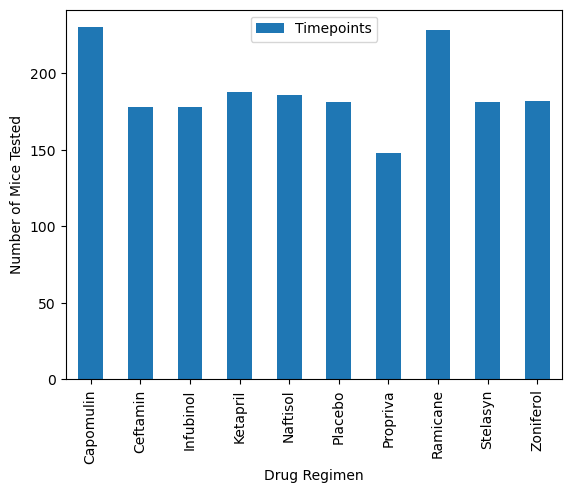

In [364]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Create variable to hold x labels for 'timepoints bar chart'
drug_reg_x_labels = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']

# Create variable to hold x value for 'timepoints bar chart'
drug_reg_values = [230,178,178,188,186,181,148,228,181,182]

# Create total_timepoints_count variable to hold the count of each drug regimen
total_timepoints_count = cleaned_df.groupby('Drug Regimen')['Timepoint'].count()

# Create variable 'timepoints_bar_df' to hold timepoints based on drug regimen in a data frame
timepoints_bar_df = pd.DataFrame({'Drug Regimen': drug_reg_x_labels, 'Timepoints':drug_reg_values})

# plot timepoints_bar_df in a bar graph
timepoints_bar_graph = timepoints_bar_df.plot.bar(x='Drug Regimen', y='Timepoints', rot=0, align = 'center')
timepoints_bar_graph;

# Set x axis, tick locations, and y-label
x_axis = np.arange(len(timepoints_bar_df))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoints_bar_df["Drug Regimen"], rotation="vertical")
plt.ylabel("Number of Mice Tested")

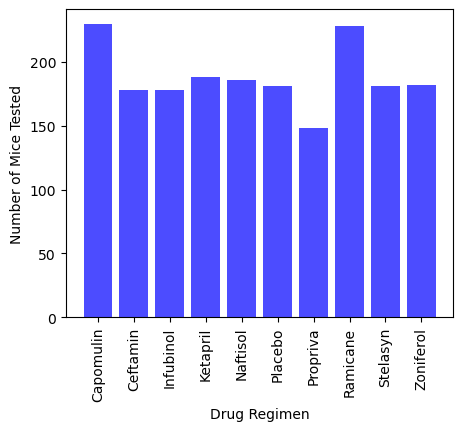

<Figure size 640x480 with 0 Axes>

In [363]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize=(5,4))
plt.bar(x_axis, timepoints_bar_df["Timepoints"], color='blue', alpha=0.7, align="center")
plt.xticks(tick_locations, timepoints_bar_df["Drug Regimen"], rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show();
plt.tight_layout();

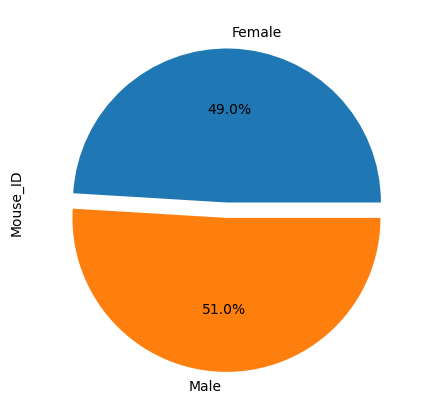

In [207]:
# Create a Groupby series that groups 'cleaned_df' by sex (use to find count of each sex)
grouped_by_sex_df = cleaned_df.groupby(['Sex'])

# Find the count of male vs female in 'Mouse_ID column', and saves values to dataframe 'sex_count_df'
sex_count_df = grouped_by_sex_df.Mouse_ID.count()
sex_count_df

# Labels for the sections of pie chart
pie_chart_labels = ["Male", "Female"]

# The values of each section of the pie chart
pie_chart_value = [958, 922]


# Create a data frame that hold specific data the pie chart will be plotting
sex_pie_chart_df = pd.DataFrame({'Sex': pie_chart_value},
                   index=pie_chart_labels)

# Generate a pie plot showing the distribution of female versus male mice using Pandas
plot_sex_pie_chart = sex_count_df.plot.pie(y='Sex', figsize=(5, 5), autopct='%1.1f%%', explode=(0, 0.1))

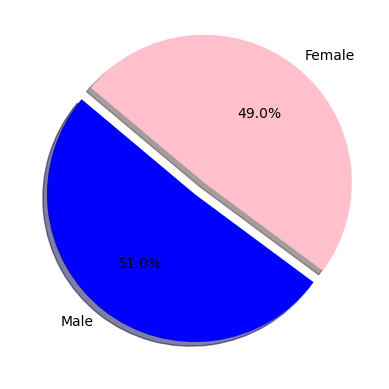

In [213]:

# Labels for the sections of pie chart
pie_chart_labels = ["Male", "Female"]

# The values of each section of the pie chart
pie_chart_value = [958, 922]

# The colors of each section of the pie chart
colors = ["blue", 'pink']


# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(pie_chart_value, explode=(0,0.1), labels=pie_chart_labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show();

In [292]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Create a variable 'grouped_by_mouse_id' to hold a data frame grouped by the 'Mouse_ID' column
grouped_by_mouse_id_df = cleaned_df.groupby(['Mouse_ID'])

# Create a variable 'max_timepoints_df' and use max function over timepoints column to find greatest timepoint for each mouse
max_timepoints_df = grouped_by_mouse_id_df.Timepoint.max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_cleaned_df = pd.merge(max_timepoints_df, cleaned_df, how='left', on=["Mouse_ID", "Timepoint"])

# Formatting (Renaming max timepoint column)
#new_cleaned_df.rename(columns = {'Timepoint_x':'Timepoint'}, inplace = True)
#new_cleaned_df.rename(columns = {'Timepoint_y':'Max Timepoint'}, inplace = True)
new_cleaned_df.head(40)

,Mouse_ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [287]:
# Put treatments into a list for for loop (and later for plot labels)
promising_treatments_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in promising_treatments_list:
         
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_rows = new_cleaned_df.loc[new_cleaned_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    final_tumor_vol_data.append(tumor_vol_rows)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_rows.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol_rows.loc[(tumor_vol_rows < lower_bound) | (tumor_vol_rows > upper_bound)] 
    print(f"{drug}{outliers}")


CapomulinSeries([], Name: Tumor Volume (mm3), dtype: float64)
RamicaneSeries([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol31    36.321346
Name: Tumor Volume (mm3), dtype: float64
CeftaminSeries([], Name: Tumor Volume (mm3), dtype: float64)


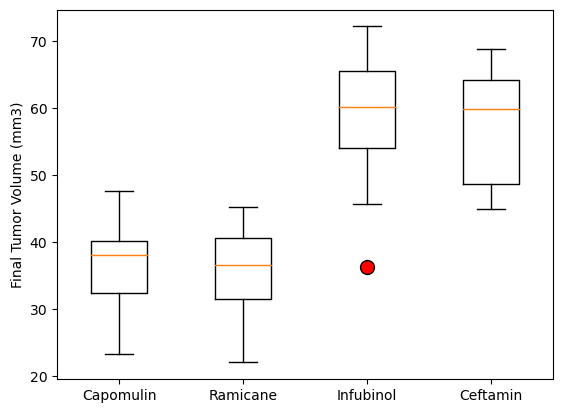

In [361]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(final_tumor_vol_data, labels = promising_treatments_list, flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'});
plt.ylabel("Final Tumor Volume (mm3)");

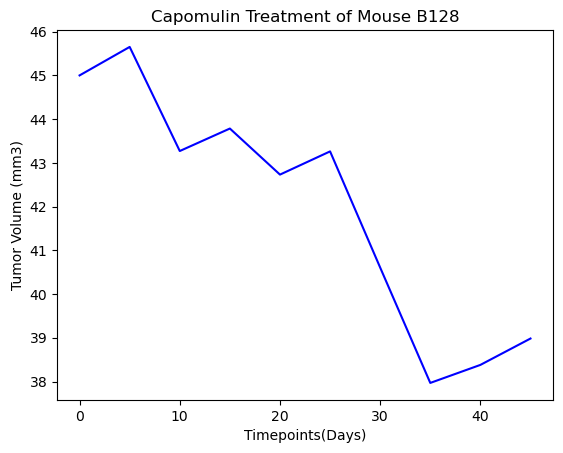

In [311]:
# Filter data based one mouse id and drug type
capomulin_mouses_df = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']
mouseid_b128 = cleaned_df.loc[cleaned_df['Mouse_ID'] == 'b128']

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
b128_tumor_volume = mouseid_b128['Tumor Volume (mm3)']
b128_timepoints = mouseid_b128['Timepoint']
plt.plot(b128_timepoints, b128_tumor_volume, color="blue", label="Mouse 'b128'");

#formatting labels and title
plt.title("Capomulin Treatment of Mouse B128")
plt.xlabel("Timepoints(Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()


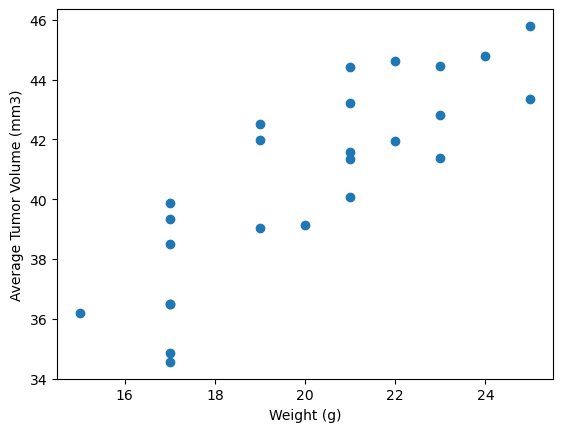

In [348]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mouses = capomulin_mouses_df.groupby(['Mouse_ID'])
avg_tumor_vol = capomulin_mouses_grouped['Tumor Volume (mm3)'].mean()
capomulin_mouses_weights = capomulin_mouses_grouped['Weight (g)'].mean()

plt.scatter(capomulin_mouses_weights, avg_tumor_vol)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


The correlation between mouse weight and average tumor volume is 0.84


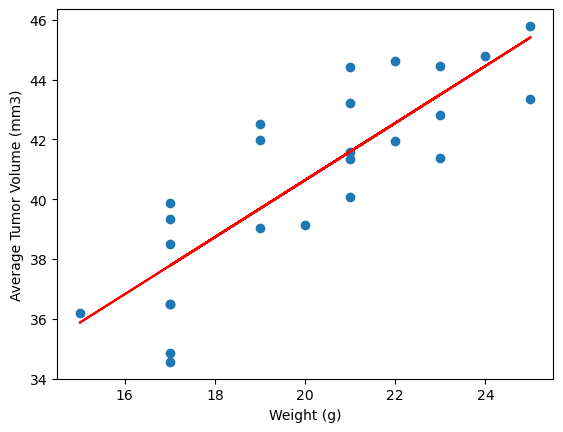

In [358]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_mouses = capomulin_mouses_df.groupby(['Mouse_ID'])
avg_tumor_vol = capomulin_mouses_grouped['Tumor Volume (mm3)'].mean()
capomulin_mouses_weights = capomulin_mouses_grouped['Weight (g)'].mean()

# Print out the r-squared value along with the plot.
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_mouses_weights, avg_tumor_vol)
regress_values = capomulin_mouses_weights * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


correlation = st.pearsonr(capomulin_mouses_weights,avg_tumor_vol)
plt.plot(capomulin_mouses_weights,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.scatter(capomulin_mouses_weights, avg_tumor_vol)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")
plt.show()

